In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binom
from ipywidgets import interact, FloatSlider, IntSlider
from matplotlib.ticker import MaxNLocator

# Working with Probability Distributions

Most common probability distributions are contained in the [`scipy stats` module](https://docs.scipy.org/doc/scipy/reference/stats.html).

## The Binomial Distribution

We learned about the binomial distribution in the slides. Now, use the widget below to explore this distribution as you vary the values of the probability of success and the number of trials.

**Question:** In adjusting the parameters, what do you notice about the binomial distribution?

In [2]:
@interact(p = FloatSlider(value = 0.5, min = 0, max = 1, step = 0.01), 
          n = IntSlider(value = 10, min = 1),
         continuous_update = False)
def binomial_dist_plot(p, n):
    x = np.arange(start = 0, stop = n+1, step = 1)
    y = binom.pmf(x, p = p, n = n)
    
    fig, ax = plt.subplots(figsize = (12,6))
    plt.bar(x, y,
            color = 'cornflowerblue',
           edgecolor = 'black')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(f'Binomial Distribution\n{n} trials, p = {p}', fontsize = 14);

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.01), IntSlider(value=10, descrip…

If you want to do calculations with the binomial distribution, you can use `binom` from the `scipy` `stats` module.

For calculating probabilties of a specific number of successes, you can use the `pmf` function. Note that pmf stands for "probability mass function".

To use this, you need to specify the following arguments:
* k: desired number of successes
* n: total number of trials
* p: probability of success

**Example:** If we flip a fair coin (probability of heads = 0.5) 10 times, what is the probability of it landing on heads exactly 7 times?

k = 7

n = 10

p =  0.5

In [3]:
binom.pmf(k=7, n=10, p=0.5)

np.float64(0.11718749999999999)

**Question:** If we flip a fair coin ten times, what is the probability that it lands on heads either **6 or 7** times?

To compute this, we can compute the probabilities of 6 and 7 separately and add them (they are mutually exclusive outcomes).

In [4]:
binom.pmf(k=6, n=10, p=0.5) + binom.pmf(k=7, n=10, p=0.5)

np.float64(0.3222656249999999)

**Question:** If we flip a fair coin ten times, what is the probability that it lands on heads **7 or fewer** times?

If you want to find the probability of $x$ _or fewer_ successes you can - rather than using the probability mass function - use the **cumulative distribution fuction**, or **cdf**. 

For a random variable X, the cdf is defined as

$$F(x) := P(X \leq x) = \text{the probability that value of the random variable is } x \text{ or less}$$

You can compute this value using the `.cdf` function. Again, we need to specify the values of the `k`, `n`, and `p` arguments.

In [5]:
binom.cdf(k = 7, n = 10, p = 0.5)

np.float64(0.9453125)

**Question:** If we flip a fair coin ten times, what is the probability that it lands on heads between 4 and 6 times, inclusive?

To answer this question, we can use the fact that

$$P(x \leq 6) = P(x \leq 3) + P(4 \leq x \leq 6)$$

Which we can rearrange into

$$P(4 \leq x \leq 6) = P(x \leq 6) - P(x \leq 3)$$

The reason that this is useful is that we can use the cumulative distribution function to compute both quantities on the right hand side.

In [6]:
binom.cdf(k = 6, n = 10, p = 0.5) - binom.cdf(k = 3, n = 10, p = 0.5)

np.float64(0.65625)

**Question:** If we flip a fair coin ten times, what is the probability that it lands on heads more than 6 times?

To answer this question, we can use the fact that (since these cover all possible outcomes)

$$P(x \leq 6) + P(x > 6) = 1$$

Hence,

$$P(x > 6) = 1 - P(x \leq 6)$$

In [7]:
1 - binom.cdf(k = 6, n = 10, p = 0.5)

np.float64(0.171875)

**Question:** If we flip a fair coin ten times, what is the probability that it lands on heads at least 4 times?

For this question, it is useful to realize that

$$P(x \geq 4) = P(x > 3) = 1 - P(x \leq 3)$$

## Mean/Expected Value of a Random Variable

Similar to data sets, random variables have a mean. For random variables, the mean is also called the **expected value**.

Loosely speaking, if we simulated outcomes from our random variable a large number of times, the mean outcome would equal the mean of the random variable.

More formally, if $X$ is a discrete random variable with pmf $f(x)$, then the expected value of $X$ is given by 

$$E[X] = \sum_{x} x \cdot f(x)$$

where the sum runs over all possible outcomes.

In [8]:
1 - binom.cdf(k = 3, n = 10, p = 0.5)

np.float64(0.828125)

The `binom` distribution we imported earlier will let us simulate a binomial random variable using the `.rvs` method.

To do it once, we specify the number of trials (n) and the probability of success (p).

In [9]:
binom.rvs(n = 10, p = 0.4)

3

We can also generate a multiple simulations by increasing the `size` argument.

In [10]:
binom.rvs(n = 10, p = 0.4, size = 20)

array([4, 5, 5, 4, 6, 3, 2, 1, 3, 4, 3, 6, 4, 3, 5, 2, 4, 3, 4, 3])

**Question:** Simulate a large number of outcomes from a binomial random variable with $n = 10$ and $p = 0.4$. What is the mean value of these outcomes?

In [11]:
binom.rvs(n=10, p=0.4, size=100).mean()

np.float64(3.87)

**Question:** Now, change the values of $n$ and $p$ in whatever way you like. How does this change the average outcome?

Do you have a guess as far as how to calculate the expected value of binomial random variable with $n$ trials and probability of success $p$?

The mean of a binomial random variable is n * p.

## Variance and Standard Deviation of a Random Variable

A random variable also has a variance and standard deviation. 

Loosely speaking, if we simulated outcomes from our random variable a large number of times, the variance and standard deviation of the outcomes would equal the variance and standard deviation of that variable, respectively.

In [12]:
(binom.rvs(n = 10, p = 0.5, size = 100000)).var()

np.float64(2.5015228710999997)

**Question:** What do you think the relationship between the probability of success, $p$, and the variance is? Experiment to test your guess by keeping $n$ fixed but varying $p$.

variance = n * p * (1 - p)

In [13]:
probs = np.linspace(start = 0, stop = 1, num = 100)   # Get 100 evenly-spaced numbers between 0 and 1
var = [(binom.rvs(n = 10, p = p, size = 100000)).var() for p in probs]             # Approximate the variance for each values of p

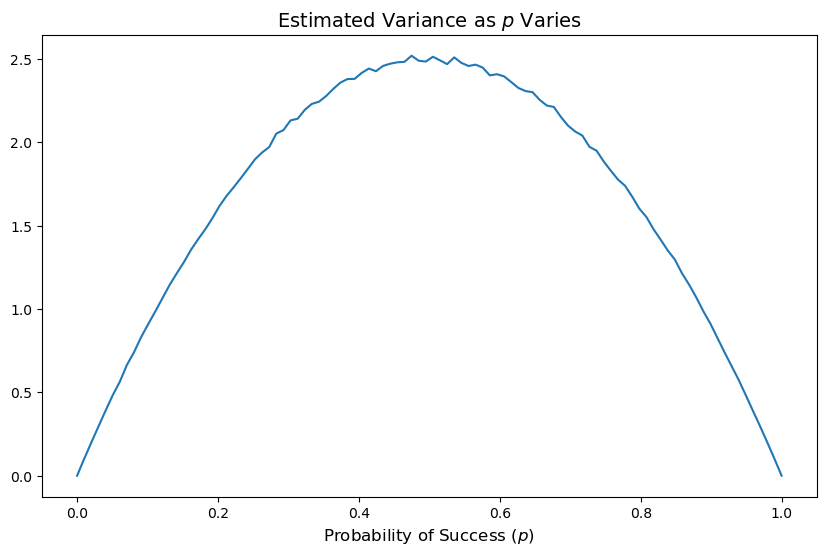

In [14]:
plt.figure(figsize = (10,6))
plt.plot(probs, var)
plt.title('Estimated Variance as $p$ Varies', fontsize = 14)
plt.xlabel('Probability of Success ($p$)', fontsize = 12);

**Question:** What does this plot tell us?

## The Normal Distribution

If you are going to work with normal distributions, import `norm` from `scipy.stats`.

In [15]:
from scipy.stats import norm

The following interactive widget demonstrates how the two parameters, $\mu$ and $\sigma$ affect the shape and location of a normal distribution.

In [16]:
@interact(mu = FloatSlider(value = 0, min = -3, max = 3, step = 0.1),
         sigma = FloatSlider(value = 1, min = 0.1, max = 3, step = 0.1))
def normal_pdf(mu, sigma):
    x = np.arange(start = -4, stop = 4, step = 0.01)
    plt.figure(figsize = (10,6))
    plt.plot(x, norm.pdf(x, loc = mu, scale = sigma), color = 'black')
    plt.fill_between(x, norm.pdf(x, loc = mu, scale = sigma), color = 'cornflowerblue')
    plt.hlines(y = 0, xmin = -4, xmax = 4, color = 'black')
    plt.ylabel('Density')
    plt.title('Normal Distribution\n $\mu$ = {}, $\sigma$= {}'.format(round(mu, 1), round(sigma, 1)))
    plt.xlim(-4, 4);

interactive(children=(FloatSlider(value=0.0, description='mu', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

For calculating probabilities with the normal distribution (or any continuous probability distribution), we will always make use of the cdf (cumulative distribution function).

**Example:** For a random variable which is normally distributed with a mean of 100 and standard deviation of 10, what is the probability that the variable is less than 80?

Recall that the cdf tells the probability that the random variable is $x$ or less. When it comes to continuous probability distributions, the probabilities don't change whether we are finding the probability of $x$ or less vs. less than $x$.

When using the `cdf` or `pdf` for a normal distribution, you need to specify the value(s) of $x$ along with
* loc: the mean
* scale: the standard deviation

In [17]:
norm.cdf(x = 80, loc = 100, scale = 10)

np.float64(0.022750131948179195)

**Example:** For a random variable which is normally distributed with a mean of 100 and standard deviation of 10, what is the probability that the variable is more than 85 but less than 115?

To answer this, you need to do the trick with subtracting two areas. Remember that the cdf only tells the probability of a particular value or less.

In [18]:
norm.cdf(x = 115, loc = 100, scale = 10) - norm.cdf(x = 85, loc = 100, scale = 10)

np.float64(0.8663855974622838)

**Example:** For a random variable which is normally distributed with a mean of 100 and standard deviation of 10, what is the probability that the variable is more than 90?

Again, you will need to do the subtraction trick.

In [19]:
1 - norm.cdf(x = 90, loc = 100, scale = 10)

np.float64(0.8413447460685429)

### Using the Normal Distribution to Estimate Probabilities

The dataset NHANES_heights_weights.csv contains a sample of participants in the National Health and Nutrition Examination Survey. Specifically, it contains the heights and weights of all male participants between the ages of 30 and 40.

In [20]:
nhanes = pd.read_csv('../data/NHANES_heights_weights.csv')

In [21]:
nhanes.head()

,SEQN,weight_kg,height_cm,age,gender
0,83856.0,89.1,181.5,30.0,male
1,83863.0,95.8,175.6,35.0,male
2,83910.0,73.2,178.9,37.0,male
3,83931.0,78.7,174.0,37.0,male
4,84011.0,119.6,178.2,32.0,male


You can get a quick glimpse at the characteristics of the dataset using the `.describe()` method.

In [22]:
nhanes['height_cm'].describe()

count    446.000000
mean     174.223767
std        7.770183
min      149.600000
25%      169.300000
50%      174.500000
75%      179.300000
max      193.800000
Name: height_cm, dtype: float64

To get a better idea of the distribution of values, we can look at a histogram.

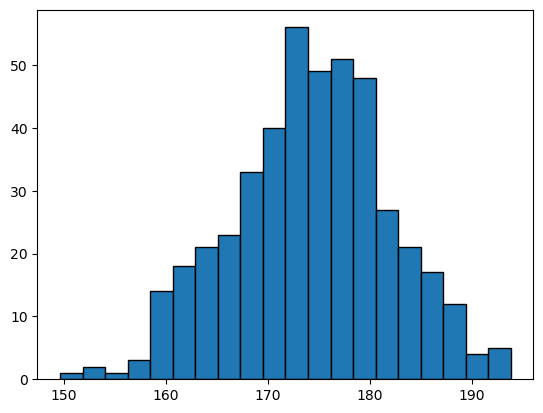

In [23]:
plt.hist(nhanes['height_cm'], bins = 20, edgecolor = 'black');

You can see that the data is roughly bell-shaped. There are some statistical tests which can be used to check whether a sample appears to have come from a normal distribution. 

Another option is to use what's called a **quantile-quantile plot**, or **Q-Q plot**. This type of plot can be used to assess whether it is plausible that a set of observations came from a particular distribution.

Specifically, a Q-Q plot is a scatterplot which shows the theoretical quantiles from the candidate distribution against the observed quantiles from the sample. If the plot is close to the identity plot (the diagonal line), then we can conclude that it is plausible (but not certain) that the sample came from that distribution. 

When looking at a Q-Q plot to evalate whether it is plausible to estimate a distribution using a normal distribution, the quantiles for a normal distribution with the same mean and standard deviation as the dataset are calculated.

We'll use the `probplot` function from scipy stats, which needs the column of interest. We'll also tell it to create the plot using matplotlib.

In [24]:
from scipy.stats import probplot

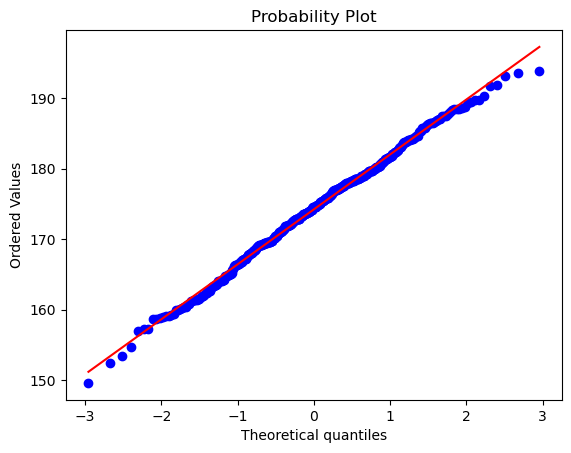

In [25]:
probplot(nhanes['height_cm'], plot = plt);

You can see that, with just a few exceptions, the sample data hugs the diagonal line. You are probably safe to model the overall distribution using a normal distribution.

You can approximate the population distribution using a normal distribution with the same mean and standard deviation as the sample.

In [26]:
mu, sigma = norm.fit(nhanes['height_cm'])

print('mu = {}'.format(mu))
print('sigma = {}'.format(sigma))

mu = 174.2237668161435
sigma = 7.761467441308138


Let's take a look at the hypothetical normal distribution against the sample data.

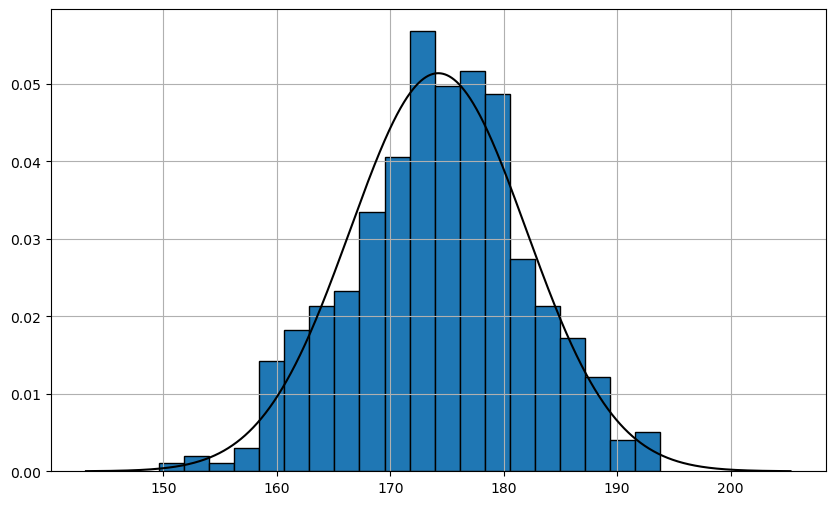

In [27]:
plt.figure(figsize = (10,6))
x = np.arange(start = -4 * sigma + mu, stop = 4 * sigma + mu, step = 0.01)  # Generate a set of x-values
y = norm.pdf(x, loc = mu, scale = sigma)                                    # Get the corresponding normal pdf values
plt.plot(x, y, color = 'black')      
nhanes['height_cm'].hist(density = True, edgecolor = 'black', bins = 20);

You can see that it's not a perfect fit, but is reasonably close.

Using this distribution, you can make predictions about the overall population.

Approximately what proportion of 30 - 40 year-old males will be under 5 feet tall (152.4 cm)?

In [28]:
norm.cdf(x=152.4, loc=mu, scale=sigma)

np.float64(0.002463184576614758)

Approximately what proportion of 30 - 40 year-old males will be over 6 feet tall (182.88 cm)?

In [29]:
1 - norm.cdf(x=182.88, loc=mu, scale=sigma)

np.float64(0.13236457043542504)

Approximately what proportion of 30 - 40 year-old males will be over 7 feet tall (213.36 cm)?

In [30]:
1 - norm.cdf(x=213.36, loc=mu, scale=sigma)

np.float64(2.298939648648357e-07)

Now, let's look at weights to see is a normal distribution looks like a good approximation.

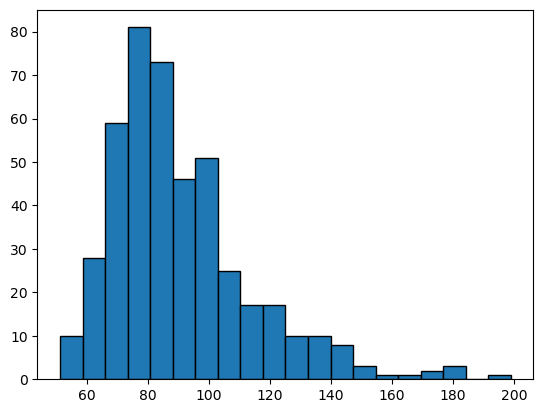

In [31]:
plt.hist(nhanes['weight_kg'], bins = 20, edgecolor = 'black');

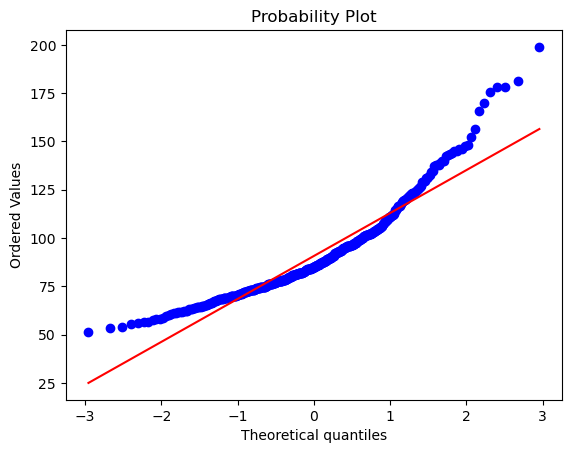

In [32]:
probplot(nhanes['weight_kg'], plot = plt);